In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

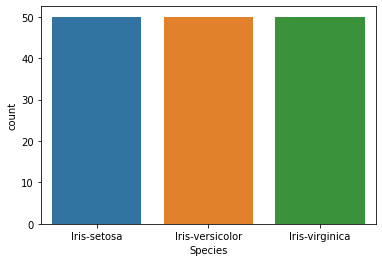

In [36]:
sns.countplot(x="Species", data = df)

In [7]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [8]:
data = X
data_std = (data - data.mean())/(data.max() - data.min())
data = pd.concat([data_std,y], axis=1)

In [9]:
data = pd.melt(data, id_vars = 'Species', var_name = 'features',value_name = 'value')
data

,Species,features,value
0,Iris-setosa,SepalLengthCm,-0.206481
1,Iris-setosa,SepalLengthCm,-0.262037
2,Iris-setosa,SepalLengthCm,-0.317593
3,Iris-setosa,SepalLengthCm,-0.345370
4,Iris-setosa,SepalLengthCm,-0.234259
...,...,...,...
595,Iris-virginica,PetalWidthCm,0.458889
596,Iris-virginica,PetalWidthCm,0.292222
597,Iris-virginica,PetalWidthCm,0.333889
598,Iris-virginica,PetalWidthCm,0.458889


C:\Users\SibusisoTlaka\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SibusisoTlaka\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


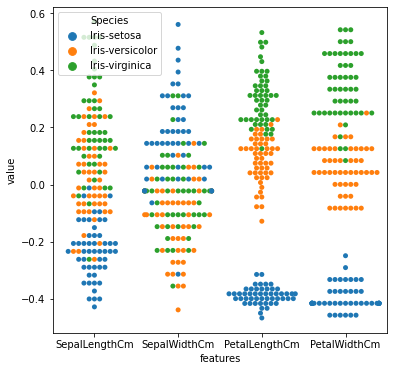

In [10]:
plt.figure(figsize = (6,6))
sns.swarmplot(x = 'features', y = 'value', hue = 'Species', data = data)
plt.show()

<AxesSubplot:>

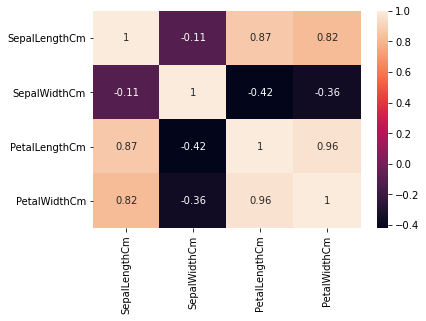

In [11]:
sns.heatmap(X.corr(), annot=True)

In [12]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (112, 4) (112,)
Testing set shape:  (38, 4) (38,)


In [13]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [14]:
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 9.17942135  2.38729628 89.33693113 51.91944934]
Columns:  Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [15]:
ft = SelectKBest(f_classif, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [ 97.40415147  28.70153517 890.49613042 763.18137566]
Columns:  Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [16]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [17]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

# k-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [19]:
from sklearn import metrics

One of the challenges in a k-NN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.

In [20]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.94736842, 0.94736842, 0.94736842, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.94736842])

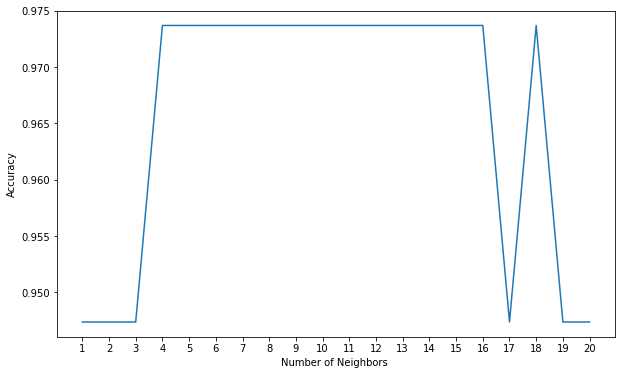

In [21]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

There are a range of values from 5 to 16 where the accuracy is the highest.

We will use the Exhaustive Grid Search technique for hyperparameter optimization. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.

In [22]:
from sklearn.model_selection import GridSearchCV

We will use three hyperparamters- n-neighbors, weights and metric.

1. n_neighbors: Decide the best k based on the values we have computed earlier.

2. weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
3. metric: The distance metric to be used will calculating the similarity.

In [23]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [24]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

Since we have provided the class validation score as 3( cv= 3), Grid Search will evaluate the model 6 x 2 x 3 x 3 = 108 times with different hyperparameters.

In [25]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    4.8s finished


In [26]:
# find the best score
g_res.best_score_

0.9556661925082978

In [27]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [28]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [29]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

# Model Evaluation

In [30]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9553571428571429
Test set accuracy:  0.9736842105263158


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)

In [34]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9733333333333334


As we see, we have obtained a very high model accuracy of 0.97. It is possible that the accuracy may be increased further by using more hyperparameters or with a different model.